In [1]:
import numpy as np
import matplotlib.pyplot as plt


[' 0.35068454096713764', ' 0.3497375015590804', ' 0.34294314818435867', ' 0.46192670425917925', ' 0.7511663411333792', ' 0.5796258326108054', ' 2.3752324130775144', ' 1.7344318174442677', 7.0, ' 6.9243931351637285', ' 6.866422987514222']
[0.32  0.318 0.316 0.315 0.314 0.312 0.31  0.308 0.3   0.29  0.28 ]
[0.08265    0.06719337 0.04921654 0.03973911 0.02374695 0.01868093
 0.00861841 0.00663438 0.00223236 0.00201577 0.00192483]
[0.00372989 0.00373688 0.0037882  0.00312216 0.00243382 0.00275091
 0.00176693 0.00187471 0.00148661 0.00158051 0.00158132]
[0.04369462 0.05368368 0.07268557 0.10391443 0.24811634 0.25510832
 0.5        0.5        0.5        0.5        0.5       ]


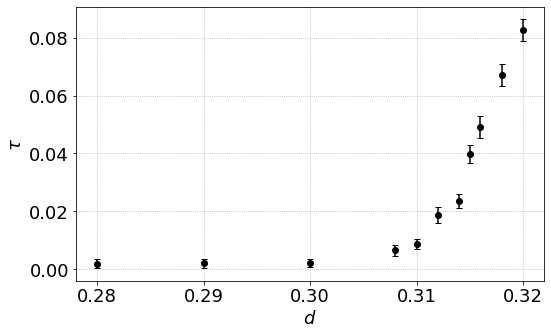

In [6]:
location = "C:/Users/komok/Desktop/smectic_params_new.txt"

x = 150
density = []
lambd = []
varLambd = []
amplitude = []
varAmplitude = []

with open(location, "r") as f:
    for line in f:
        line = line.strip().split("=")
        # print(line)
        if line[0] == "d":
            density.append(line[-1])
        elif line[0] == "A ": 
            amplitude.append(line[-1])
        elif line[0] == "varA ":
            varAmplitude.append(line[-1])
        elif line[0] == "lambda ":
            # clamp correlation length to 300 pixels for readability
            l = line[-1]
            if float(l) > 7.:
                l = 7.
            lambd.append(l)
        elif line[0] == "varLambda ": 
            l = line[-1]
            if float(l) > 0.5:
                l = 0.5
            varLambd.append(l)
        else:
            continue
density = np.array(density, dtype=float)
amplitude = np.array(amplitude, dtype=float)
Damplitude = np.array(varAmplitude, dtype=float)
print(lambd)
lambd = np.array(lambd, dtype=float)
Dlambd = np.array(varLambd, dtype=float)
lambd *= 1/7      # rescale correlation length from pixels to box width

print(density)
print(amplitude)
print(Damplitude)
print(Dlambd)

plt.figure(figsize=(8, 5))
# plt.scatter(density, amplitude, )
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({"text.usetex": False})
plt.errorbar(density, amplitude, yerr=Damplitude, fmt='o', capsize=3, c='black', ecolor = "black", label="tau")
plt.xlabel(r'$d$')
plt.ylabel(r'$\tau$')
plt.grid(linestyle='dotted')
plt.tight_layout()
# plt.title(f"smectic order parameter at wall")
# plt.show()
plt.savefig(f"C:/Users/komok/Desktop/smectic_parameter_wall.jpg", dpi=300)





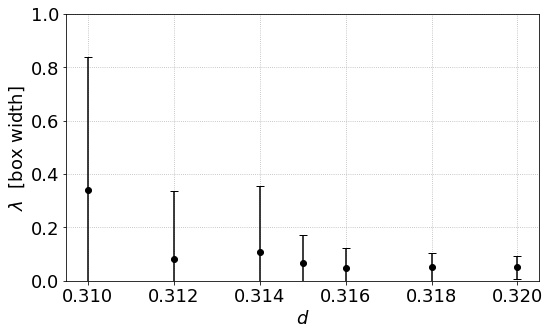

In [7]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({"text.usetex": False})
plt.errorbar(density[:-4], lambd[:-4], yerr=Dlambd[:-4], fmt='o', capsize=4, c='black', ecolor = "black")
plt.xlabel(r'$d$')
plt.ylabel(r"$\lambda$  [box width]")
plt.ylim(0, 1)
plt.grid(linestyle='dotted')
plt.tight_layout()

# plt.show()
plt.savefig(f"C:/Users/komok/Desktop/correlation_length.jpg", dpi=300)